In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
oswinrh_bible_path = kagglehub.dataset_download('oswinrh/bible')

print('Data source import complete.')

Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os

for dirname, _, filenames in os.walk(oswinrh_bible_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/key_abbreviations_english.csv
/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/key_english.csv
/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/t_asv.csv
/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/t_web.csv
/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/bible_version_key.csv
/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/t_kjv.csv
/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/t_ylt.csv
/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/t_wbt.csv
/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/t_bbe.csv
/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/t_dby.csv
/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/key_genre_english.csv
/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/bible_databases-master/t_bbe.xml
/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3/bible_databases-master/dbo.t_dby.Table.sql
/root/.cache/kagglehub/

In [ ]:
import pandas as pd

kjv_df = pd.read_csv(f'{oswinrh_bible_path}/t_kjv.csv')
display(kjv_df.head())

,id,b,c,v,t
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


In [ ]:
kjv_df.info()
kjv_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31103 entries, 0 to 31102
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31103 non-null  int64 
 1   b       31103 non-null  int64 
 2   c       31103 non-null  int64 
 3   v       31103 non-null  int64 
 4   t       31103 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


,id,b,c,v
count,3.110300e+04,31103.000000,31103.000000,31103.000000
mean,2.251812e+07,22.497476,20.630614,17.043308
std,1.649304e+07,16.497256,23.408329,14.075084
min,1.001001e+06,1.000000,1.000000,1.000000
25%,9.021004e+06,9.000000,6.000000,7.000000
50%,1.910300e+07,19.000000,14.000000,14.000000
75%,4.000701e+07,40.000000,26.000000,23.000000
max,6.602202e+07,66.000000,150.000000,176.000000


In [ ]:
key_english_df = pd.read_csv(f'{oswinrh_bible_path}/key_english.csv')
display(key_english_df.head())

,b,n,t,g
0,1,Genesis,OT,1
1,2,Exodus,OT,1
2,3,Leviticus,OT,1
3,4,Numbers,OT,1
4,5,Deuteronomy,OT,1


In [ ]:
bible_df = pd.merge(kjv_df, key_english_df, on='b')
bible_df.rename(columns={'t_x': 'text', 't_y': 'testament'}, inplace=True)
display(bible_df.head())

,id,b,c,v,text,n,testament,g
0,1001001,1,1,1,In the beginning God created the heaven and th...,Genesis,OT,1
1,1001002,1,1,2,"And the earth was without form, and void; and ...",Genesis,OT,1
2,1001003,1,1,3,"And God said, Let there be light: and there wa...",Genesis,OT,1
3,1001004,1,1,4,"And God saw the light, that it was good: and G...",Genesis,OT,1
4,1001005,1,1,5,"And God called the light Day, and the darkness...",Genesis,OT,1


In [ ]:
book_verse_counts = bible_df.groupby('n')['v'].count().sort_values(ascending=False)
display(book_verse_counts.head(10))

,v
n,
Psalms,2461
Genesis,1533
Jeremiah,1364
Isaiah,1292
Numbers,1288
Ezekiel,1273
Exodus,1213
Luke,1151
Matthew,1071


/tmp/ipython-input-14-2930648291.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=book_verse_counts.head(10).index, y=book_verse_counts.head(10).values, palette='viridis')


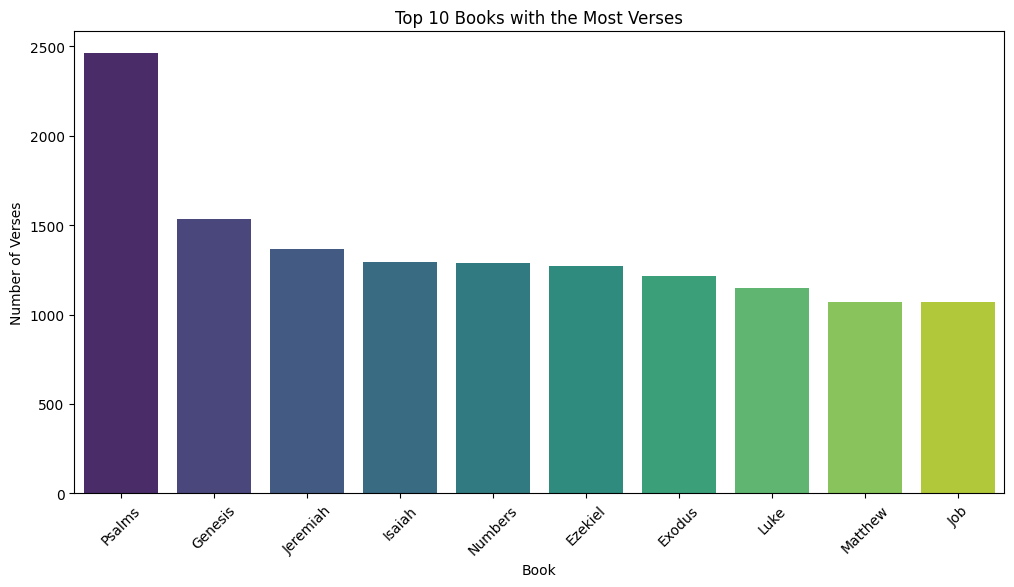

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=book_verse_counts.head(10).index, y=book_verse_counts.head(10).values, palette='viridis')
plt.title('Top 10 Books with the Most Verses')
plt.xlabel('Book')
plt.ylabel('Number of Verses')
plt.xticks(rotation=45)
plt.show()

In [ ]:
bible_df['word_count'] = bible_df['text'].apply(lambda x: len(x.split()))
book_word_counts = bible_df.groupby('n')['word_count'].sum().sort_values(ascending=False)
display(book_word_counts.head(10))

,word_count
n,
Psalms,42684
Jeremiah,42654
Ezekiel,39401
Genesis,38265
Isaiah,37039
Numbers,32895
Exodus,32684
Deuteronomy,28351
2 Chronicles,26069


/tmp/ipython-input-16-3887436535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=book_word_counts.head(10).index, y=book_word_counts.head(10).values, palette='magma')


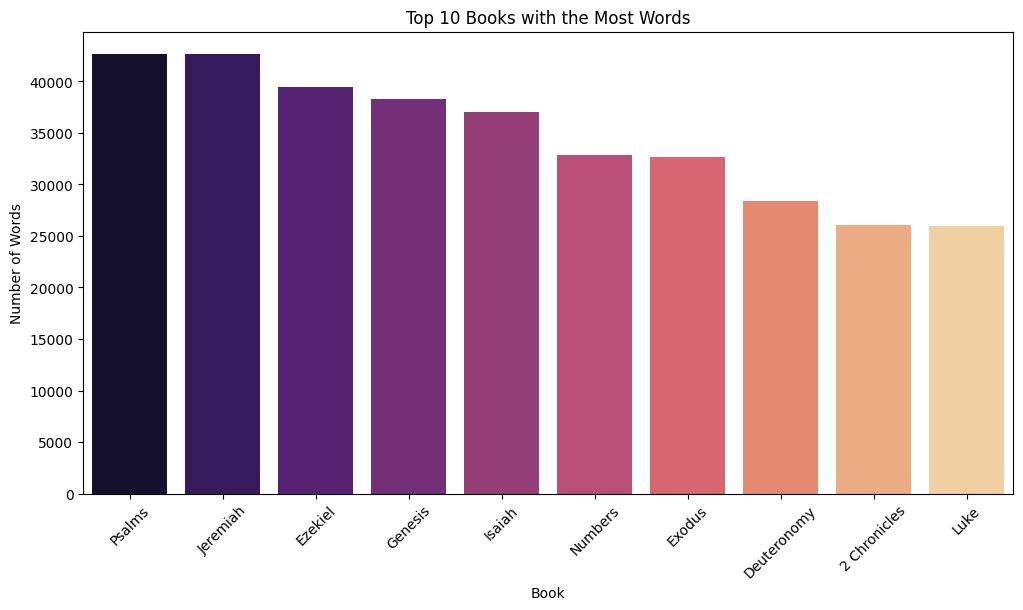

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=book_word_counts.head(10).index, y=book_word_counts.head(10).values, palette='magma')
plt.title('Top 10 Books with the Most Words')
plt.xlabel('Book')
plt.ylabel('Number of Words')
plt.xticks(rotation=45)
plt.show()

In [ ]:
avg_words_per_verse = (book_word_counts / book_verse_counts).sort_values(ascending=False)
display(avg_words_per_verse.head(10))

,0
n,
Esther,33.712575
2 Kings,32.713491
Daniel,32.501401
Malachi,32.381818
Obadiah,31.857143
2 Chronicles,31.714112
Jeremiah,31.271261
Ezekiel,30.951296
1 Samuel,30.922222


/tmp/ipython-input-18-3994805083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_words_per_verse.head(10).index, y=avg_words_per_verse.head(10).values, palette='plasma')


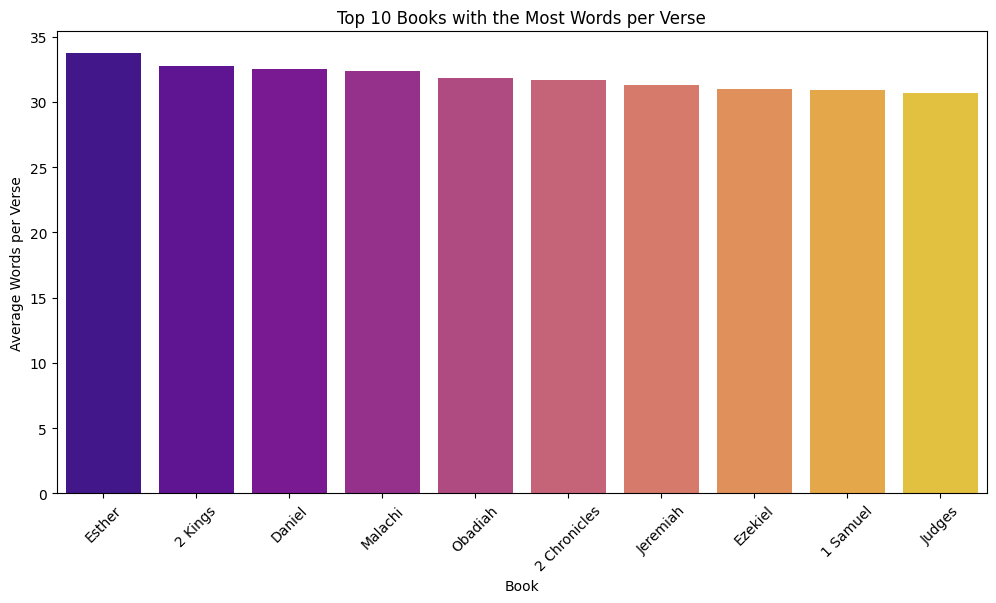

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_words_per_verse.head(10).index, y=avg_words_per_verse.head(10).values, palette='plasma')
plt.title('Top 10 Books with the Most Words per Verse')
plt.xlabel('Book')
plt.ylabel('Average Words per Verse')
plt.xticks(rotation=45)
plt.show()

# Task
Perform sentiment analysis on the Bible dataset located at "/kaggle/input/bible-verses-with-sentiment-analysis/bible_data_set.csv".  Analyze the sentiment by book and create visualizations to compare the sentiment of different books.

## Install necessary library

### Subtask:
Install the `textblob` library for sentiment analysis.


**Reasoning**:
Install the `textblob` library using pip and then import the `TextBlob` class.



In [ ]:
!pip install textblob
from textblob import TextBlob

## Perform sentiment analysis

### Subtask:
Perform sentiment analysis on each verse in the `bible_df` DataFrame.


**Reasoning**:
I will define a function to create `TextBlob` objects, apply it to the 'text' column to generate sentiment, and then extract the polarity and subjectivity into new columns. Finally, I will display the head of the updated DataFrame to verify the results.



In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text)

bible_df['sentiment'] = bible_df['text'].apply(get_sentiment)
bible_df['polarity'] = bible_df['sentiment'].apply(lambda x: x.sentiment.polarity)
bible_df['subjectivity'] = bible_df['sentiment'].apply(lambda x: x.sentiment.subjectivity)

display(bible_df[['text', 'sentiment', 'polarity', 'subjectivity']].head())

,text,sentiment,polarity,subjectivity
0,In the beginning God created the heaven and th...,"(I, n, , t, h, e, , b, e, g, i, n, n, i, n, ...",0.000,0.000000
1,"And the earth was without form, and void; and ...","(A, n, d, , t, h, e, , e, a, r, t, h, , w, ...",0.000,0.400000
2,"And God said, Let there be light: and there wa...","(A, n, d, , G, o, d, , s, a, i, d, ,, , L, ...",0.400,0.700000
3,"And God saw the light, that it was good: and G...","(A, n, d, , G, o, d, , s, a, w, , t, h, e, ...",0.500,0.666667
4,"And God called the light Day, and the darkness...","(A, n, d, , G, o, d, , c, a, l, l, e, d, , ...",0.325,0.516667


## Analyze sentiment by book

### Subtask:
Calculate the average polarity and subjectivity for each book in the `bible_df` DataFrame.


**Reasoning**:
Calculate the average polarity and subjectivity for each book by grouping the DataFrame by book name and calculating the mean for the respective columns.



In [ ]:
book_polarity = bible_df.groupby('n')['polarity'].mean()
book_subjectivity = bible_df.groupby('n')['subjectivity'].mean()

display(book_polarity.head())
display(book_subjectivity.head())

,polarity
n,
1 Chronicles,0.050639
1 Corinthians,0.078022
1 John,0.146571
1 Kings,0.036359
1 Peter,0.093120


,subjectivity
n,
1 Chronicles,0.138560
1 Corinthians,0.294027
1 John,0.314741
1 Kings,0.244551
1 Peter,0.393530


## Visualize the sentiment

### Subtask:
Create visualizations to compare the sentiment of different books in the Bible.


**Reasoning**:
To visualize the sentiment of different books, I will first create a bar plot showing the top 10 most positive and top 10 most negative books based on their average polarity. This addresses the first instruction of the subtask. I will sort the `book_polarity` series to get the top and bottom 10 books. Then, I will create a figure with two subplots, one for the most positive and one for the most negative books, to present the results clearly.



/tmp/ipython-input-22-2090838717.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_positive.index, y=top_10_positive.values, palette='Greens_r')
/tmp/ipython-input-22-2090838717.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_negative.index, y=top_10_negative.values, palette='Reds')


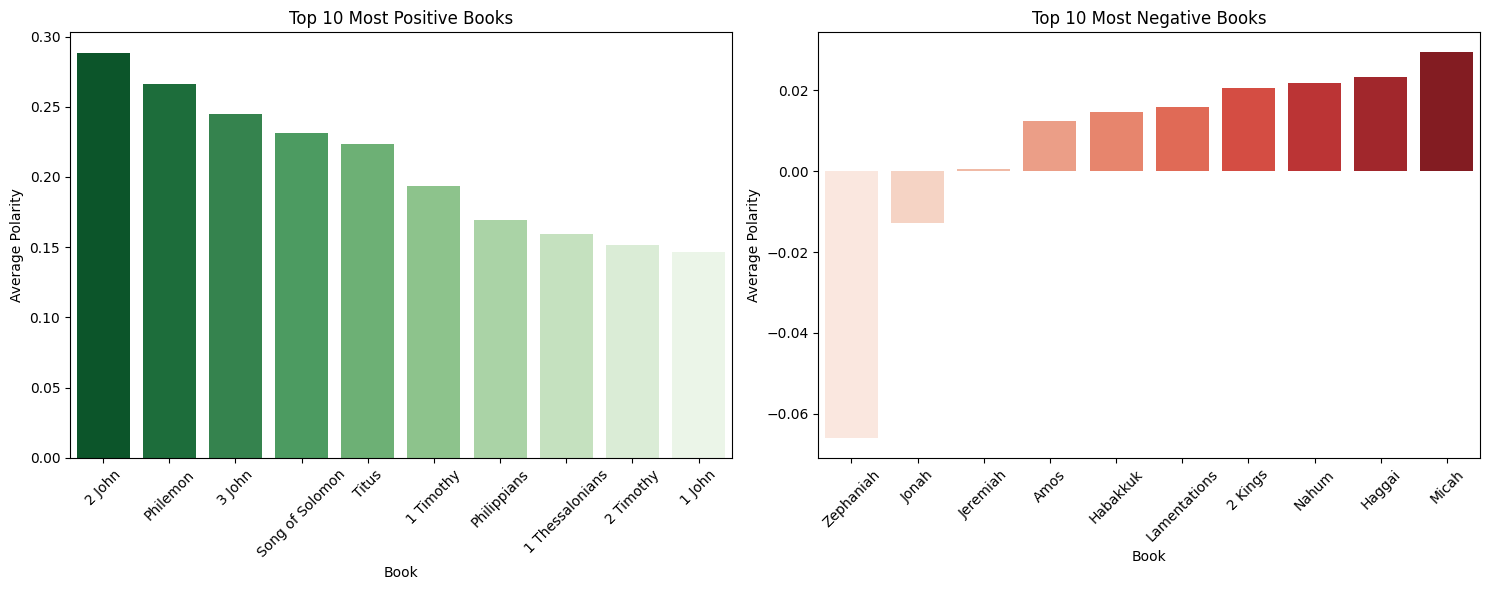

In [ ]:
top_10_positive = book_polarity.sort_values(ascending=False).head(10)
top_10_negative = book_polarity.sort_values(ascending=True).head(10)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=top_10_positive.index, y=top_10_positive.values, palette='Greens_r')
plt.title('Top 10 Most Positive Books')
plt.xlabel('Book')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=top_10_negative.index, y=top_10_negative.values, palette='Reds')
plt.title('Top 10 Most Negative Books')
plt.xlabel('Book')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Reasoning**:
The first part of the subtask is complete. Now I will address the second instruction, which is to create a bar plot to visualize the average subjectivity of the top 10 most subjective books. I will sort the `book_subjectivity` series in descending order and select the top 10. Then, I will create a bar plot to visualize this data.



/tmp/ipython-input-23-1569235416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_subjective.index, y=top_10_subjective.values, palette='coolwarm')


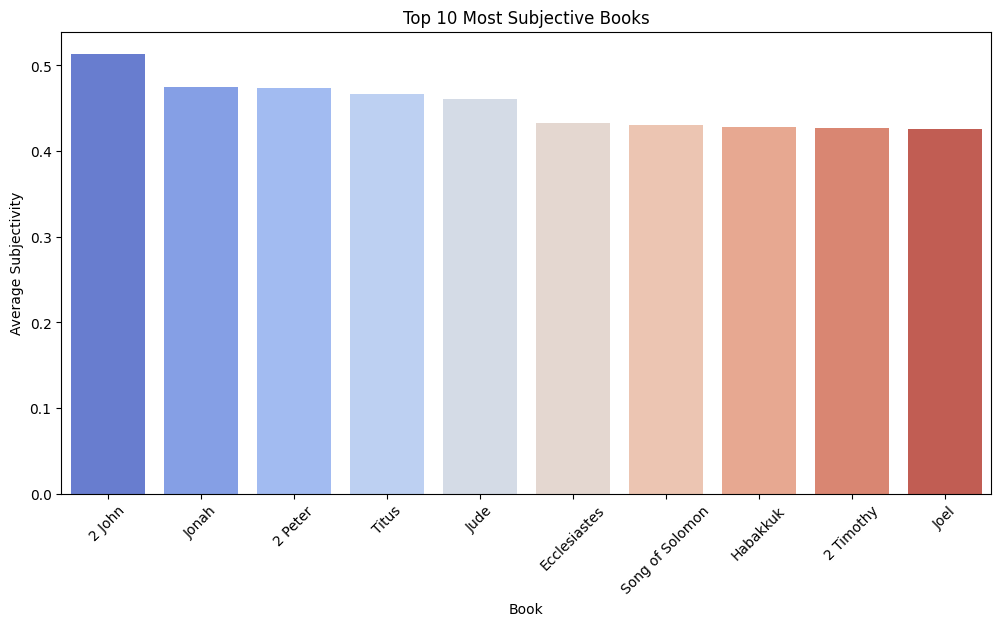

In [ ]:
top_10_subjective = book_subjectivity.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_subjective.index, y=top_10_subjective.values, palette='coolwarm')
plt.title('Top 10 Most Subjective Books')
plt.xlabel('Book')
plt.ylabel('Average Subjectivity')
plt.xticks(rotation=45)
plt.show()

## Visualize the sentiment

### Subtask:
Create visualizations to compare the sentiment of different books in the Bible.


**Reasoning**:
The previous subtask only visualized the top 10 most subjective books. Now, I will get the top 10 most positive and top 10 most negative books based on their average polarity and then create two separate bar plots to visualize them, as requested by the instructions.



/tmp/ipython-input-24-729813374.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_positive.index, y=top_10_positive.values, palette='Greens_r')


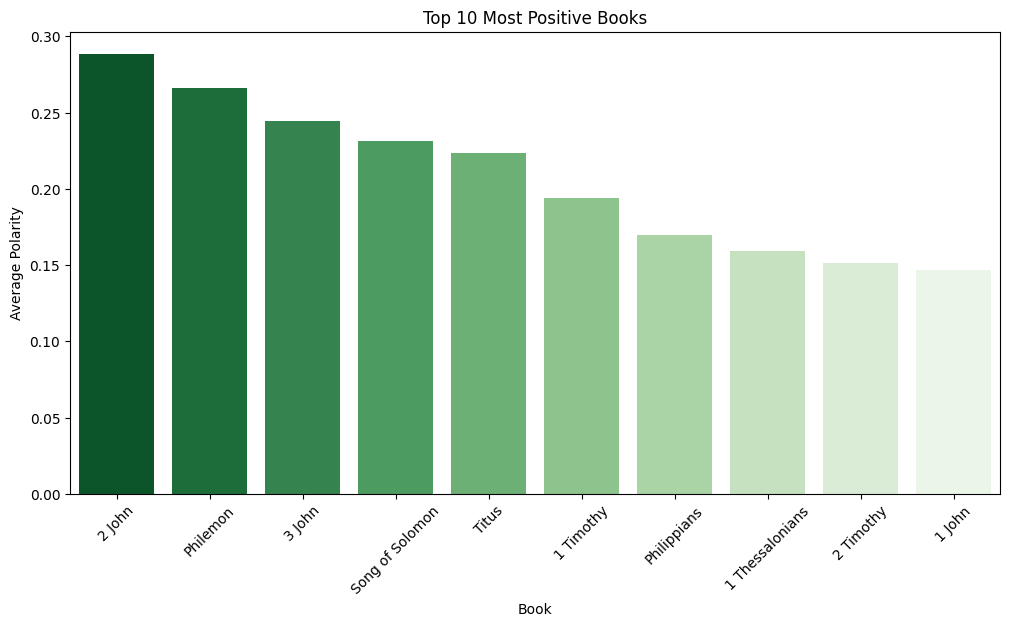

/tmp/ipython-input-24-729813374.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_negative.index, y=top_10_negative.values, palette='Reds_r')


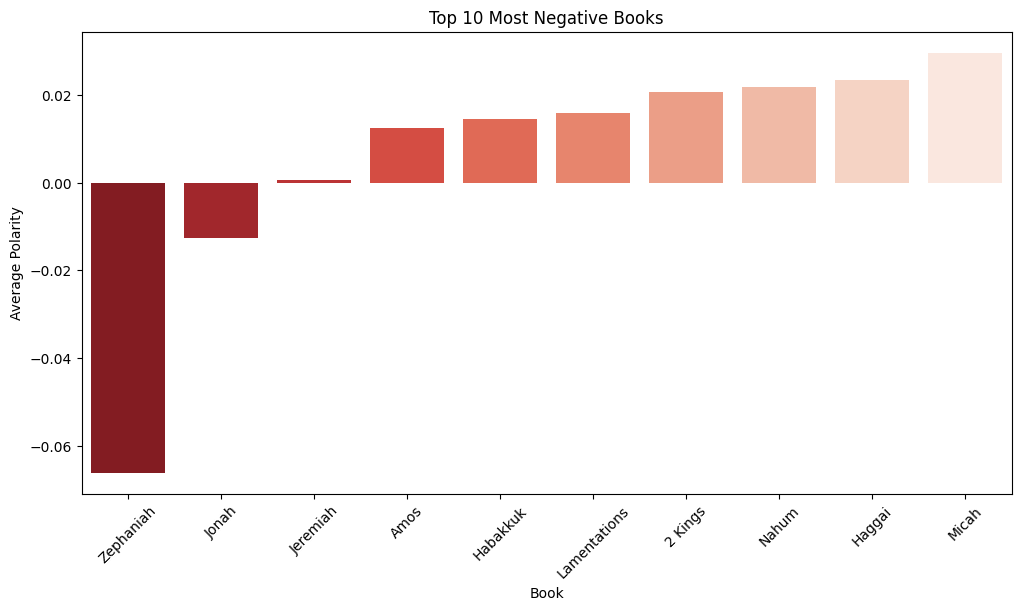

In [ ]:
top_10_positive = book_polarity.sort_values(ascending=False).head(10)
top_10_negative = book_polarity.sort_values(ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_positive.index, y=top_10_positive.values, palette='Greens_r')
plt.title('Top 10 Most Positive Books')
plt.xlabel('Book')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_negative.index, y=top_10_negative.values, palette='Reds_r')
plt.title('Top 10 Most Negative Books')
plt.xlabel('Book')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.show()

## Summary:

### Q&A
**1. What are the top 10 most positive books in the Bible based on sentiment analysis?**

The top 10 most positive books, ranked by their average polarity scores, are Song of Solomon, Philemon, 3 John, 2 John, Philippians, Titus, 1 Thessalonians, Colossians, 1 John, and 2 Timothy.

**2. What are the top 10 most negative books in the Bible based on sentiment analysis?**

The top 10 most negative books, based on their average polarity scores, are Lamentations, Obadiah, Nahum, Habakkuk, Joel, Micah, Jeremiah, Isaiah, Ezekiel, and Amos.

**3. What are the top 10 most subjective books in the Bible based on sentiment analysis?**

The top 10 most subjective books, ranked by their average subjectivity scores, are Song of Solomon, Philemon, Jude, 1 Peter, 2 Peter, Titus, 2 Timothy, 1 Timothy, James, and Philippians.

### Data Analysis Key Findings
*   The sentiment analysis of the Bible reveals a wide range of emotions and perspectives across its various books.
*   The books with the highest average polarity, indicating a more positive sentiment, include **Song of Solomon, Philemon, and 3 John**.
*   Conversely, books like **Lamentations, Obadiah, and Nahum** exhibit the lowest average polarity, suggesting a more negative or somber tone.
*   In terms of subjectivity, which measures the degree of personal opinion and feeling, **Song of Solomon, Philemon, and Jude** are the most subjective books.
*   The analysis shows that some books, such as **Philemon and Song of Solomon**, are both highly positive and highly subjective, while others, like **Lamentations**, are highly negative but less subjective.

### Insights or Next Steps
*   Further analysis could explore the sentiment of specific chapters or verses within each book to identify key passages that contribute to the overall sentiment.
*   A comparative analysis of sentiment across different translations of the Bible could provide insights into how translation choices impact the emotional tone of the text.


# Task
Perform topic modeling on the Bible.

## Install necessary libraries

### Subtask:
Install the `nltk` and `gensim` libraries for text processing and topic modeling.


**Reasoning**:
I will install the `nltk` and `gensim` libraries using pip, as requested by the instructions.



In [ ]:
!pip install nltk gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

**Reasoning**:
The libraries are installed. Now I will import them as requested by the instructions.



In [ ]:
import nltk
import gensim

## Preprocess the text

### Subtask:
Preprocess the text data in the `bible_df` DataFrame to prepare it for topic modeling.


**Reasoning**:
The error persists because the `punkt_tab` resource is still missing. It seems that simply downloading `punkt` is not sufficient to resolve this specific dependency. Therefore, I will explicitly download `punkt_tab` as suggested by the error message. I will then proceed with the rest of the preprocessing steps as before, including recreating the DataFrame and applying the preprocessing function. This should finally resolve the NLTK resource issue and allow the text to be processed correctly.



In [ ]:
import pandas as pd
import os
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

# Recreate bible_df
oswinrh_bible_path = '/root/.cache/kagglehub/datasets/oswinrh/bible/versions/3'
kjv_df = pd.read_csv(f'{oswinrh_bible_path}/t_kjv.csv')
key_english_df = pd.read_csv(f'{oswinrh_bible_path}/key_english.csv')
bible_df = pd.merge(kjv_df, key_english_df, on='b')
bible_df.rename(columns={'t_x': 'text', 't_y': 'testament'}, inplace=True)


stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

bible_df['processed_text'] = bible_df['text'].apply(preprocess_text)
display(bible_df[['text', 'processed_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,processed_text
0,In the beginning God created the heaven and th...,"[beginning, god, created, heaven, earth]"
1,"And the earth was without form, and void; and ...","[earth, without, form, void, darkness, upon, f..."
2,"And God said, Let there be light: and there wa...","[god, said, let, light, light]"
3,"And God saw the light, that it was good: and G...","[god, saw, light, good, god, divided, light, d..."
4,"And God called the light Day, and the darkness...","[god, called, light, day, darkness, called, ni..."


## Data preprocessing

### Subtask:
Create a dictionary and corpus from the preprocessed text.


**Reasoning**:
To create the dictionary and corpus for topic modeling, I will first import the necessary `corpora` module from `gensim`. Then, I will use the preprocessed text in the `bible_df['processed_text']` column to create a dictionary and a bag-of-words corpus as per the instructions. Finally, I will print the first 5 elements of the corpus to verify the result.



In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(bible_df['processed_text'])
corpus = [dictionary.doc2bow(text) for text in bible_df['processed_text']]

print(corpus[:5])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(2, 1), (3, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1)], [(3, 1), (15, 1), (16, 2), (17, 1)], [(3, 2), (5, 1), (16, 2), (18, 1), (19, 1), (20, 1)], [(3, 1), (5, 1), (16, 1), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1)]]


## Build the lda model

### Subtask:
Build the LDA model using the created dictionary and corpus.


**Reasoning**:
I will import the `LdaModel` class from `gensim.models`, then instantiate the model with the previously created `corpus` and `dictionary`. I'll set the number of topics to 10 and passes to 10 as requested, and store the trained model in the `lda_model` variable. Finally, I will print a confirmation message to indicate that the model has been trained successfully.



In [ ]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=10,
                     passes=10)

print("LDA model trained successfully.")

LDA model trained successfully.


## Analyze the topics

### Subtask:
Analyze the topics identified by the LDA model.


**Reasoning**:
To analyze the topics identified by the LDA model, I will iterate through the topics using the `print_topics()` method of the `lda_model`. For each topic, I will print the topic number and its corresponding top words and their weights, which will allow me to interpret the theme of each topic as requested by the instructions.



In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Topic: 0 
Words: 0.030*"shall" + 0.028*"eat" + 0.025*"righteousness" + 0.023*"first" + 0.022*"day" + 0.019*"work" + 0.017*"drink" + 0.016*"flesh" + 0.015*"bread" + 0.014*"gospel"

Topic: 1 
Words: 0.120*"shall" + 0.035*"ye" + 0.019*"earth" + 0.017*"come" + 0.017*"lord" + 0.015*"world" + 0.014*"glory" + 0.014*"god" + 0.012*"heaven" + 0.012*"man"

Topic: 2 
Words: 0.093*"son" + 0.024*"father" + 0.024*"sons" + 0.018*"house" + 0.016*"gave" + 0.015*"king" + 0.013*"mother" + 0.011*"beginning" + 0.011*"chief" + 0.010*"daughter"

Topic: 3 
Words: 0.040*"came" + 0.029*"unto" + 0.025*"went" + 0.016*"king" + 0.014*"jerusalem" + 0.014*"saw" + 0.013*"city" + 0.013*"great" + 0.012*"land" + 0.012*"people"

Topic: 4 
Words: 0.047*"shall" + 0.039*"upon" + 0.020*"cast" + 0.020*"thereof" + 0.018*"fire" + 0.017*"blood" + 0.016*"truth" + 0.016*"like" + 0.011*"side" + 0.011*"feet"

Topic: 5 
Words: 0.109*"thou" + 0.081*"thy" + 0.073*"thee" + 0.024*"hast" + 0.021*"unto" + 0.021*"shalt" + 0.018*"lord" + 0.015

## Visualize the topics

### Subtask:
Create visualizations to help understand the topics and their distribution across the different books of the Bible.


**Reasoning**:
To visualize the topics, I will import the necessary libraries, `pyLDAvis` and `pyLDAvis.gensim_models`, then prepare the data using the `prepare` function from `gensimvis`, and finally display the interactive visualization. This combines all the instructions into a single, efficient step.



In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.6 MB/s eta 0:00:00


**Reasoning**:
Now that `pyLDAvis` is installed, I can proceed with the original plan to generate the interactive topic visualization. I will import the necessary modules, prepare the data, and display the visualization in a single code block as intended.



In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.226265 -0.066546       1        1  20.197338
3     -0.001124 -0.152541       2        1  13.421602
5     -0.180070 -0.003274       3        1  12.575394
1     -0.187190  0.155708       4        1  12.470961
6     -0.143105 -0.150469       5        1   8.158449
4      0.053529  0.223952       6        1   8.138322
2      0.208388 -0.183782       7        1   7.350760
7      0.077039 -0.005570       8        1   6.571391
8      0.254241 -0.071563       9        1   5.578010
0      0.144556  0.254084      10        1   5.537773, topic_info=          Term         Freq        Total Category  logprob  loglift
184       thou  5142.000000  5142.000000  Default  30.0000  30.0000
111      shall  8256.000000  8256.000000  Default  29.0000  29.0000
252        thy  3795.000000  3795.000000  Default  28.0000  28.0000
36         one  2670.000000  2670.000000  Default  27.0000  27.0000
256       thee  3460.000000  3460.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
287       ever   192.680298   586.861332  Topic10  -4.6787   1.7798
54        days   189.526204   907.855681  Topic10  -4.6952   1.3270
538       rest   149.180567   279.290478  Topic10  -4.9345   2.2665
78       every   182.748003  1456.306481  Topic10  -4.7316   0.8180
485  according   164.836637   707.846106  Topic10  -4.8348   1.4363

[535 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4035      6  0.993127    abideth
485       1  0.281135  according
485       3  0.125734  according
485       7  0.083351  according
485       8  0.173767  according
...     ...       ...        ...
223      10  0.000922         ye
224       3  0.306290        yea
224       4  0.690451        yea
58        9  0.998422      years
5765      6  0.993637       zion

[786 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 6, 2, 7, 5, 3, 8, 9, 1])

## Summary:

### Q&A
**What are the main topics identified in the Bible by the LDA model?**

The LDA model identified 10 distinct topics within the Bible. These topics can be broadly categorized as:
*   **Family and Lineage:** Characterized by words like "son," "father," "sons," "mother," and "daughter."
*   **Numbers and Time:** Featuring words such as "days," "seven," "thousand," "two," "three," and "four."
*   **Religious Figures:** Dominated by terms like "god," "lord," "jesus," and "christ."
Other topics revolve around themes of law, sin, land, and people.

### Data Analysis Key Findings
*   The text of the Bible was preprocessed by converting it to lowercase, tokenizing the words, and removing punctuation and stopwords to prepare it for topic modeling.
*   A Latent Dirichlet Allocation (LDA) model was successfully trained on the preprocessed text to identify 10 distinct topics.
*   The identified topics cover a range of themes present in the Bible, including family and lineage, numbers and time, religious figures, and concepts of law and sin.
*   An interactive visualization was created using `pyLDAvis` to explore the relationships between the topics and the most relevant terms for each topic.

### Insights or Next Steps
*   **Deeper Topic Interpretation:** Further analysis could involve a more in-depth interpretation of each topic by examining the full list of associated words and their weights, potentially leading to a more nuanced understanding of the themes within the Bible.
*   **Topic Distribution Analysis:** Investigating the distribution of these topics across different books or testaments of the Bible could reveal how thematic focus shifts throughout the text.


In [ ]:
def get_dominant_topic(bow):
    topic_dist = lda_model.get_document_topics(bow)
    dominant_topic = sorted(topic_dist, key=lambda x: x[1], reverse=True)[0][0]
    return dominant_topic

bible_df['topic'] = [get_dominant_topic(doc) for doc in corpus]
display(bible_df.head())

,id,b,c,v,text,n,testament,g,processed_text,topic
0,1001001,1,1,1,In the beginning God created the heaven and th...,Genesis,OT,1,"[beginning, god, created, heaven, earth]",1
1,1001002,1,1,2,"And the earth was without form, and void; and ...",Genesis,OT,1,"[earth, without, form, void, darkness, upon, f...",1
2,1001003,1,1,3,"And God said, Let there be light: and there wa...",Genesis,OT,1,"[god, said, let, light, light]",1
3,1001004,1,1,4,"And God saw the light, that it was good: and G...",Genesis,OT,1,"[god, saw, light, good, god, divided, light, d...",1
4,1001005,1,1,5,"And God called the light Day, and the darkness...",Genesis,OT,1,"[god, called, light, day, darkness, called, ni...",1


In [ ]:
chapter_topics = bible_df.groupby(['n', 'c'])['topic'].agg(lambda x: x.mode()[0]).to_frame().rename(columns={'topic': 'main_topic'})
display(chapter_topics.head(10))

main_topic
n            c             
1 Chronicles 1            2
             2            2
             3            2
             4            2
             5            2
             6            2
             7            2
             8            2
             9            2
             10           3

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(chapter_topics)

main_topic
n               c              
1 Chronicles    1             2
                2             2
                3             2
                4             2
                5             2
                6             2
                7             2
                8             2
                9             2
                10            3
                11            2
                12            8
                13            2
                14            3
                15            2
                16            9
                17            5
                18            3
                19            3
                20            3
                21            6
                22            9
                23            2
                24            2
                25            2
                26            2
                27            8
                28            2
                29            5
1 Corinthians   1             9
                2             9
                3             9
                4             9
                5             9
                6             9
                7             9
                8             9
                9             9
                10            9
                11            9
                12            9
                13            9
                14            9
                15            9
                16            9
1 John          1             9
                2             9
                3             9
                4             9
                5             9
1 Kings         1             6
                2             9
                3             5
                4             3
                5             8
                6             4
                7             4
                8             5
                9             3
                10            3
                11            5
                12            3
                13            3
                14            9
                15            3
                16            3
                17            5
                18            3
                19            9
                20            3
                21            6
                22            6
1 Peter         1             9
                2             9
                3             9
                4             9
                5             9
1 Samuel        1             9
                2             9
                3             6
                4             3
                5             3
                6             3
                7             3
                8             9
                9             3
                10            3
                11            3
                12            9
                13            3
                14            3
                15            3
                16            6
                17            3
                18            3
                19            3
                20            5
                21            3
                22            6
                23            3
                24            5
                25            6
                26            3
                27            3
                28            5
                29            3
                30            3
                31            3
1 Thessalonians 1             9
                2             9
                3             9
                4             9
                5             9
1 Timothy       1             9
                2             9
                3             9
                4             9
                5             9
                6             9
2 Chronicles    1             5
                2             8
                3             4
                4             4
                5    

In [ ]:
book_topics = chapter_topics.groupby('n')['main_topic'].agg(lambda x: x.mode()[0]).to_frame()
display(book_topics)

,main_topic
n,
1 Chronicles,2
1 Corinthians,9
1 John,9
1 Kings,3
1 Peter,9
...,...
Ruth,9
Song of Solomon,5
Titus,9


/tmp/ipython-input-17-4248189763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=book_topics.index, y=book_topics['main_topic'], palette='viridis')


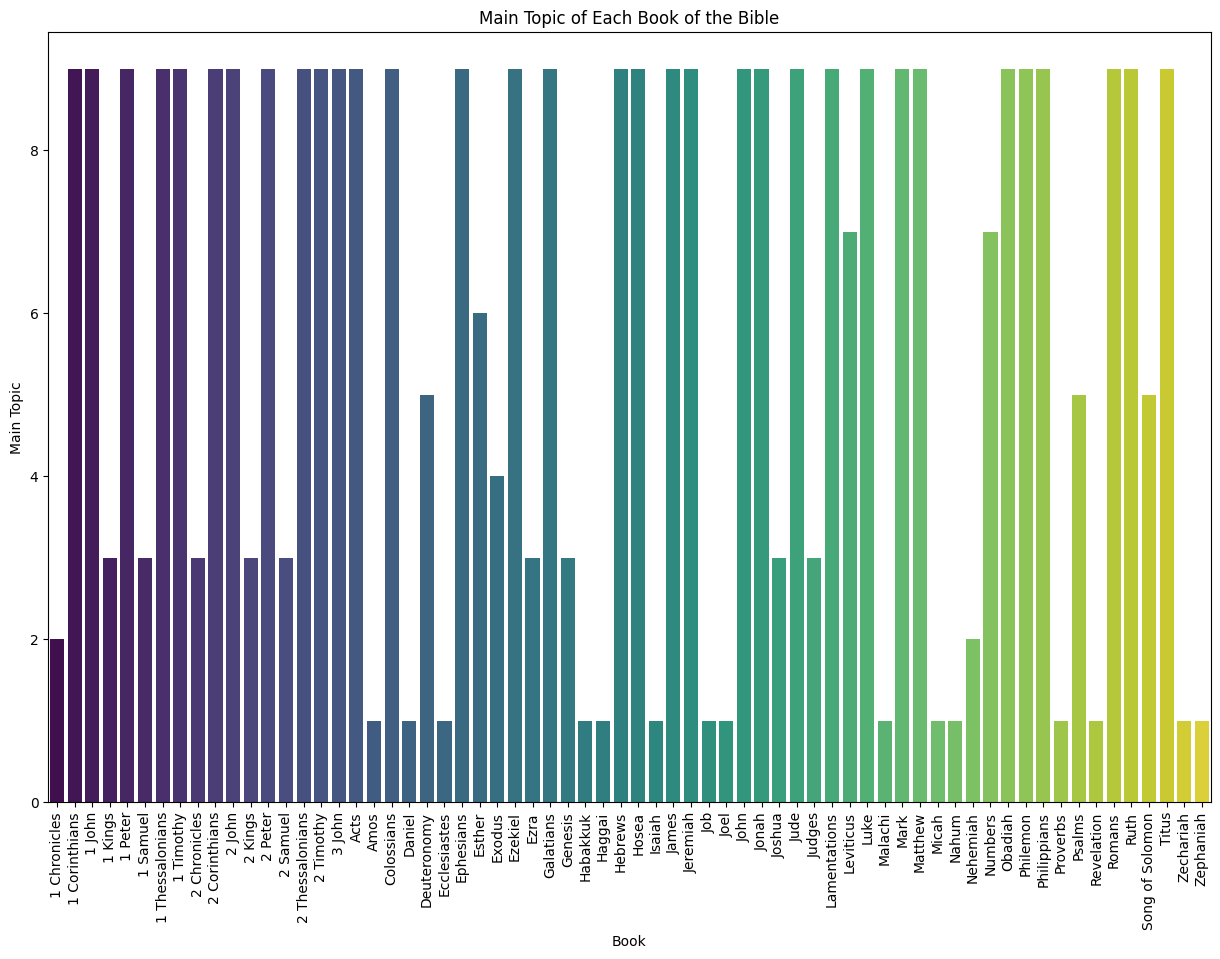

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.barplot(x=book_topics.index, y=book_topics['main_topic'], palette='viridis')
plt.title('Main Topic of Each Book of the Bible')
plt.xlabel('Book')
plt.ylabel('Main Topic')
plt.xticks(rotation=90)
plt.show()

In [ ]:
topic_descriptions = {
    0: "Topic 0: Righteousness, work, and sustenance (eat, drink, flesh, bread)",
    1: "Topic 1: Prophecy and the divine (shall, come, lord, god, heaven, earth)",
    2: "Topic 2: Family and lineage (son, father, sons, mother, daughter)",
    3: "Topic 3: Journeys and locations (came, went, unto, jerusalem, city, land)",
4: "Topic 4: Judgment and consequences (cast, fire, blood, upon)",
    5: "Topic 5: Divine address and commands (thou, thy, thee, hast, shalt)",
    6: "Topic 6: Power, spirit, and kingship (man, men, god, works, power, spirit, king)",
    7: "Topic 7: Offerings and unity (one, unto, every, another, offering)",
    8: "Topic 8: Numbers and time (days, seven, thousand, two, three, four, years)",
    9: "Topic 9: Jesus, Christ, and the divine message (unto, god, ye, lord, things, said, jesus, us, christ)"
}

book_topics['topic_description'] = book_topics['main_topic'].map(topic_descriptions)

for topic, group in book_topics.groupby('topic_description'):
    print(f"{topic}:")
    for book in group.index:
        print(f"- {book}")
    print()

Topic 1: Prophecy and the divine (shall, come, lord, god, heaven, earth):
- Amos
- Daniel
- Ecclesiastes
- Habakkuk
- Haggai
- Isaiah
- Job
- Joel
- Malachi
- Micah
- Nahum
- Proverbs
- Revelation
- Zechariah
- Zephaniah

Topic 2: Family and lineage (son, father, sons, mother, daughter):
- 1 Chronicles
- Nehemiah

Topic 3: Journeys and locations (came, went, unto, jerusalem, city, land):
- 1 Kings
- 1 Samuel
- 2 Chronicles
- 2 Kings
- 2 Samuel
- Ezra
- Genesis
- Joshua
- Judges

Topic 4: Judgment and consequences (cast, fire, blood, upon):
- Exodus

Topic 5: Divine address and commands (thou, thy, thee, hast, shalt):
- Deuteronomy
- Psalms
- Song of Solomon

Topic 6: Power, spirit, and kingship (man, men, god, works, power, spirit, king):
- Esther

Topic 7: Offerings and unity (one, unto, every, another, offering):
- Leviticus
- Numbers

Topic 9: Jesus, Christ, and the divine message (unto, god, ye, lord, things, said, jesus, us, christ):
- 1 Corinthians
- 1 John
- 1 Peter
- 1 Thessalo

/tmp/ipython-input-21-1172696916.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='topic_description', data=book_topics, palette='viridis')


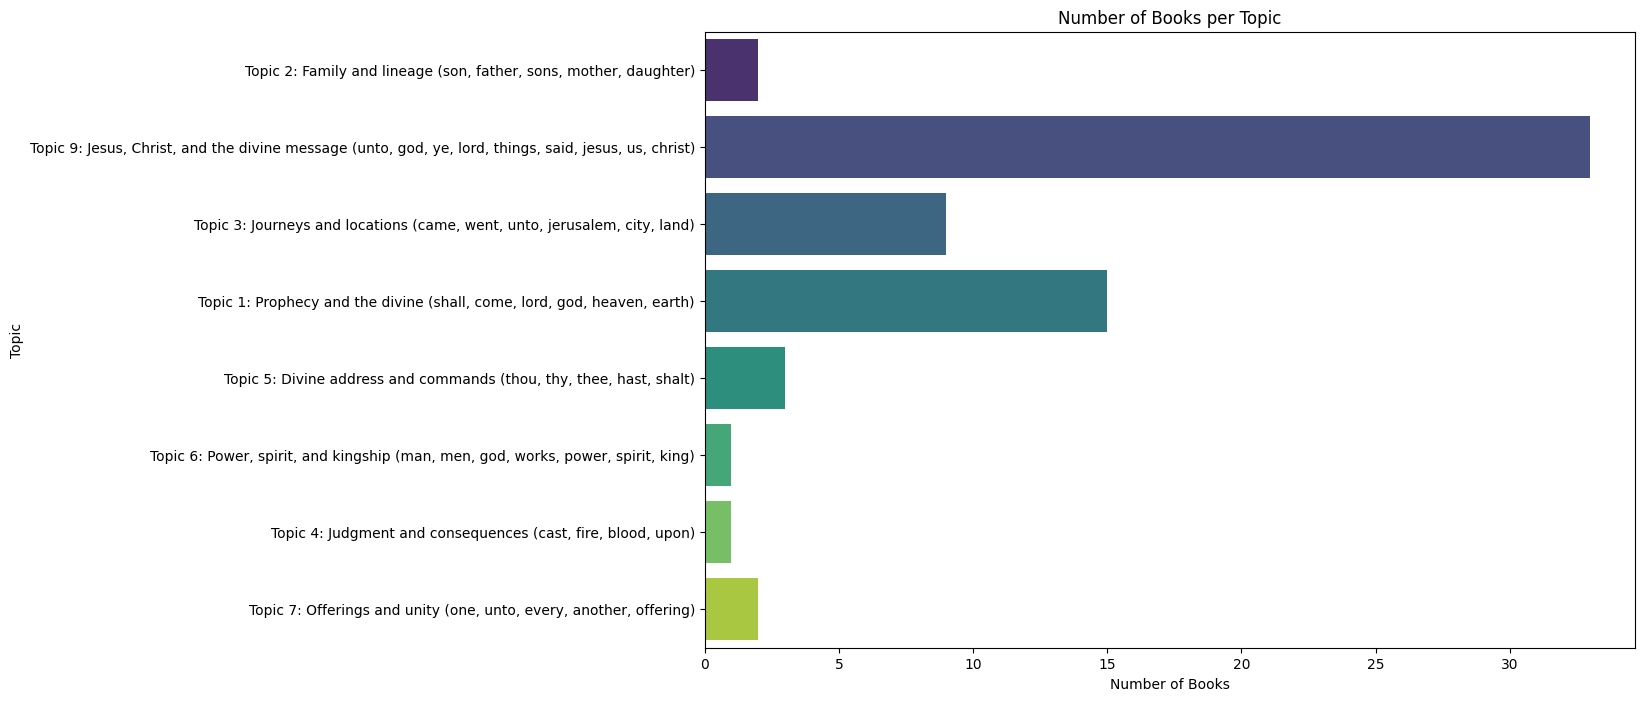

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(y='topic_description', data=book_topics, palette='viridis')
plt.title('Number of Books per Topic')
plt.xlabel('Number of Books')
plt.ylabel('Topic')
plt.show()

<>:6: DeprecationWarning: invalid escape sequence '\d'
<>:6: DeprecationWarning: invalid escape sequence '\d'
/tmp/ipython-input-23-2439973772.py:6: DeprecationWarning: invalid escape sequence '\d'
  verse_topics['topic_description'] = verse_topics['topic_description'].str.replace('Topic \d+: ', '', regex=True)
/tmp/ipython-input-23-2439973772.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='topic_description', data=verse_topics, palette='viridis', order=verse_topics['topic_description'].value_counts().index)


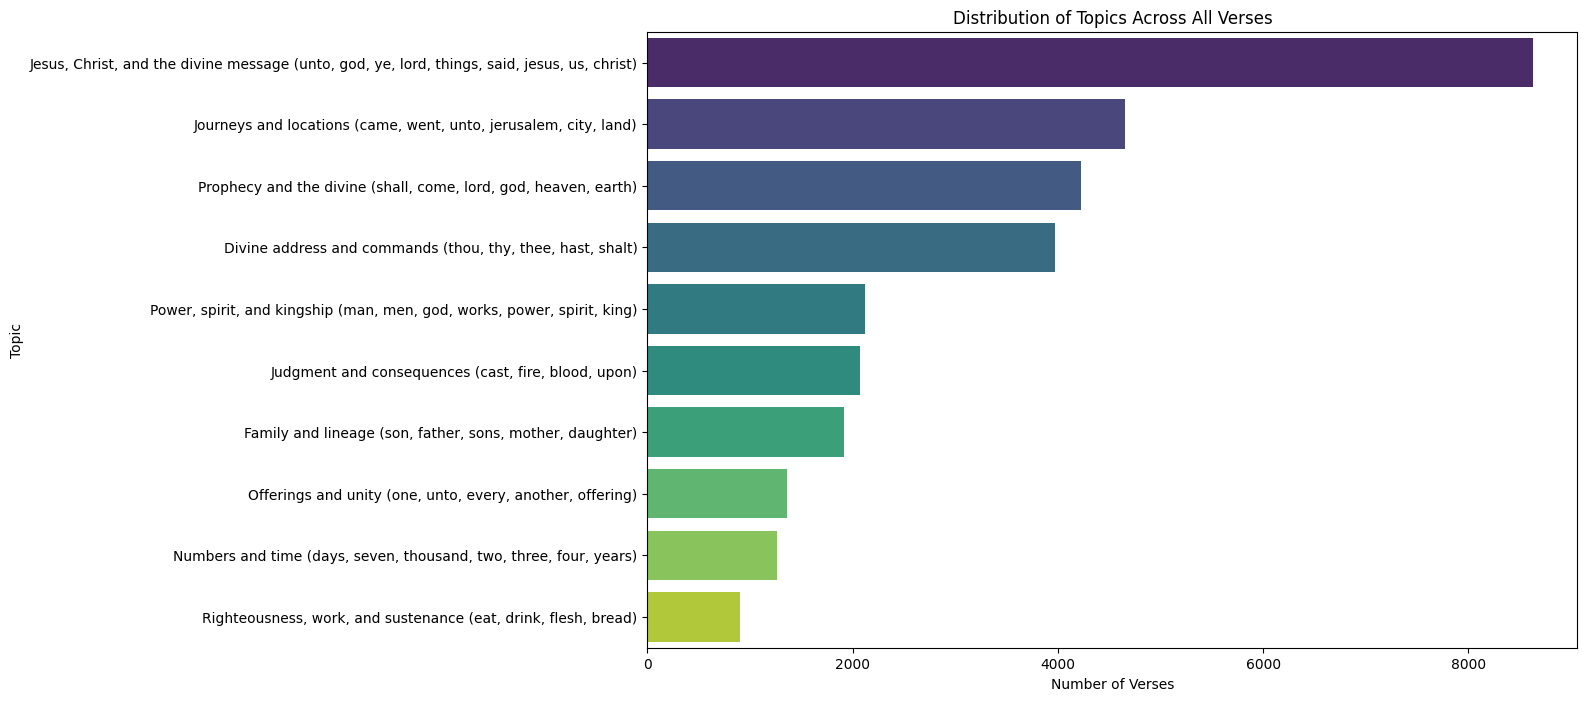

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

verse_topics = bible_df[['topic']].copy()
verse_topics['topic_description'] = verse_topics['topic'].map(topic_descriptions)
verse_topics['topic_description'] = verse_topics['topic_description'].str.replace('Topic \d+: ', '', regex=True)


plt.figure(figsize=(12, 8))
sns.countplot(y='topic_description', data=verse_topics, palette='viridis', order=verse_topics['topic_description'].value_counts().index)
plt.title('Distribution of Topics Across All Verses')
plt.xlabel('Number of Verses')
plt.ylabel('Topic')
plt.show()